In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from textblob import TextBlob

# Define the ticker and the time period
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch the stock data
aapl_data = yf.download(ticker, start=start_date, end=end_date)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
aapl_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [7]:
aapl_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [5]:
aapl_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

aapl_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [6]:
# Create a DataFrame with dates from the AAPL data
dates = aapl_data.index
text_data = pd.DataFrame(dates, columns=['Date'])


In [7]:
# Generate random headlines
headline_samples = [
    "AAPL hits record high",
    "Concerns over AAPL's future growth",
    "AAPL to unveil new product next month",
    "AAPL reports earnings that exceed forecasts",
    "Market downturn affects AAPL",
    "AAPL invests in renewable energy",
    "New AAPL CEO announced",
    "AAPL faces regulatory scrutiny",
    "AAPL rumored to acquire a tech startup",
    "AAPL's market share grows"
]

# Assign a random headline to each date
text_data['Headline'] = np.random.choice(headline_samples, size=len(text_data))

# Display the first few rows of the updated DataFrame
text_data.head()

,Date,Headline
0,2020-01-02,AAPL to unveil new product next month
1,2020-01-03,AAPL to unveil new product next month
2,2020-01-06,AAPL faces regulatory scrutiny
3,2020-01-07,AAPL rumored to acquire a tech startup
4,2020-01-08,AAPL reports earnings that exceed forecasts


In [10]:
text_data.head(30)

,Date,Headline
0,2020-01-02,AAPL to unveil new product next month
1,2020-01-03,AAPL to unveil new product next month
2,2020-01-06,AAPL faces regulatory scrutiny
3,2020-01-07,AAPL rumored to acquire a tech startup
4,2020-01-08,AAPL reports earnings that exceed forecasts
5,2020-01-09,AAPL invests in renewable energy
6,2020-01-10,AAPL reports earnings that exceed forecasts
7,2020-01-13,Concerns over AAPL's future growth
8,2020-01-14,AAPL's market share grows
9,2020-01-15,AAPL to unveil new product next month


In [11]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the sentiment analysis function to your headlines
text_data['Sentiment'] = text_data['Headline'].apply(calculate_sentiment)

In [12]:
text_data.head(30)

,Date,Headline,Sentiment
0,2020-01-02,AAPL to unveil new product next month,0.068182
1,2020-01-03,AAPL to unveil new product next month,0.068182
2,2020-01-06,AAPL faces regulatory scrutiny,0.000000
3,2020-01-07,AAPL rumored to acquire a tech startup,0.000000
4,2020-01-08,AAPL reports earnings that exceed forecasts,0.000000
5,2020-01-09,AAPL invests in renewable energy,0.000000
6,2020-01-10,AAPL reports earnings that exceed forecasts,0.000000
7,2020-01-13,Concerns over AAPL's future growth,0.000000
8,2020-01-14,AAPL's market share grows,0.000000
9,2020-01-15,AAPL to unveil new product next month,0.068182


In [19]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data = text_data.set_index('Date').join(aapl_data['Close'])
combined_data.head()

,Headline,Sentiment,Close
Date,,,
2020-01-02,New AAPL CEO announced,0.136364,72.620842
2020-01-03,AAPL rumored to acquire a tech startup,0.000000,71.914825
2020-01-06,AAPL hits record high,0.160000,72.487839
2020-01-07,AAPL hits record high,0.160000,72.146950
2020-01-08,AAPL reports earnings that exceed forecasts,0.000000,73.307518


The pct_change() is a pandas method that calculates the percentage change between the current and previous row.

for example:
(71.914825-72.620842) / 72.620842 = -0.009722


**Why It's Useful**

* Helps identify volatility or trends.

* Often used in financial modeling, risk analysis, or correlation with sentiment.




In [22]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [21]:
combined_data.head()

,Headline,Sentiment,Close,Daily Returns
Date,,,,
2020-01-02,New AAPL CEO announced,0.136364,72.620842,NaN
2020-01-03,AAPL rumored to acquire a tech startup,0.000000,71.914825,-0.009722
2020-01-06,AAPL hits record high,0.160000,72.487839,0.007968
2020-01-07,AAPL hits record high,0.160000,72.146950,-0.004703
2020-01-08,AAPL reports earnings that exceed forecasts,0.000000,73.307518,0.016086


# Pearson Correlation

What Pearson Correlation Measures linear relationship on continious variables
Range: from -1 to +1

+1: Perfect positive linear relationship

-1: Perfect negative linear relationship

 0: No linear relationship



A variable is continuous if:


*  It can take any value within a range (including decimals/fractions).

*  There are infinitely many possible values between any two numbers.



A variable is discrete if:


*   It takes distinct, separate values, usually integers or categories.
*   There are a finite or countably infinite number of values.
[link text](https://)

In [23]:
correlation = combined_data['Sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)


Correlation between sentiment and daily stock returns: -0.0038699590715752493


In [24]:
correlation = combined_data['Sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.009365307071209783


In [27]:
combined_data['Lagged Sentiment'] = combined_data['Sentiment'].shift(1)
correlation = combined_data['Lagged Sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.004039718450436448


Summary
Weak or No Real Relationship: It’s possible sentiment really doesn’t move this stock — or the sentiment scoring isn’t accurate or relevant enough.

# Spearson Correlation

In [28]:
# Spearman correlation between sentiment and daily returns
spearman_corr_returns = combined_data['Sentiment'].corr(combined_data['Daily Returns'], method='spearman')
print("Spearman correlation (sentiment vs daily returns):", spearman_corr_returns)

Spearman correlation (sentiment vs daily returns): -0.005591241883863777


In [29]:
# Spearman correlation between sentiment and closing prices
spearman_corr_close = combined_data['Sentiment'].corr(combined_data['Close'], method='spearman')
print("Spearman correlation (sentiment vs closing price):", spearman_corr_close)

Spearman correlation (sentiment vs closing price): 0.002588738711991352


# Kendall’s Tau


In [34]:
from scipy.stats import kendalltau

tau_returns, _ = kendalltau(combined_data['Sentiment'], combined_data['Daily Returns'])
tau_close, _ = kendalltau(combined_data['Sentiment'], combined_data['Close'])

print("Kendall's Tau (sentiment vs daily returns):", tau_returns)
print("Kendall's Tau (sentiment vs closing price):", tau_close)

Kendall's Tau (sentiment vs daily returns): nan
Kendall's Tau (sentiment vs closing price): 0.002177238355394313


In [32]:
print(combined_data['Sentiment'].isna().sum())
print(combined_data['Daily Returns'].isna().sum())
print(combined_data[['Sentiment', 'Daily Returns']].dropna().shape)

0
1
(755, 2)


In [33]:
from scipy.stats import kendalltau

# Drop rows with NaNs before computing
filtered = combined_data[['Sentiment', 'Daily Returns']].dropna()
tau_returns, _ = kendalltau(filtered['Sentiment'], filtered['Daily Returns'])
print("Fixed Kendall's Tau (sentiment vs daily returns):", tau_returns)


Fixed Kendall's Tau (sentiment vs daily returns): -0.003996171587574078


Interpretation
This value is:

Very close to 0

Negative, but not meaningfully so

It indicates no monotonic relationship between sentiment and daily stock returns, even when using the more conservative Kendall’s Tau method.

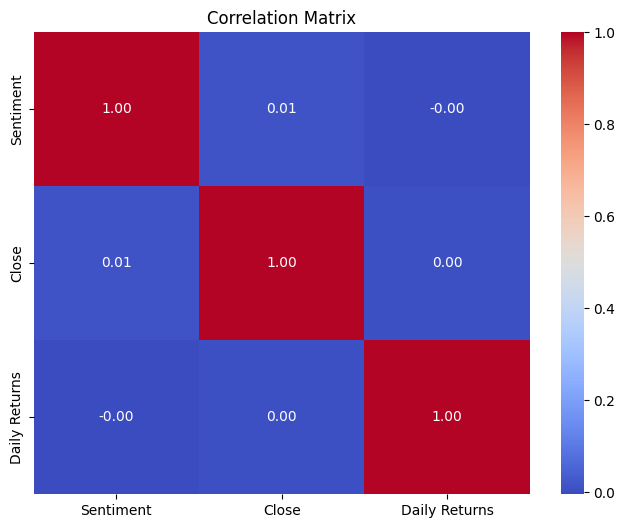

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns you want to compare
corr_data = combined_data[['Sentiment', 'Close', 'Daily Returns']].dropna()

# Calculate correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can also try 'spearman' or 'kendall'

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [15]:
from textblob import TextBlob

text1 = "This is the best day of my life."
text2 = "It is an average product."
text3 = "I hate everything about this."

print(TextBlob(text1).sentiment.polarity)  # ~0.8 (positive)
print(TextBlob(text2).sentiment.polarity)  # ~0.0 (neutral)
print(TextBlob(text3).sentiment.polarity)  # ~-1.0 (negative)


1.0
-0.15
-0.8
